# OpenET SIMS
## Image Class Property/Method Example
This example shows how to instantiate the model Image class for a single Landsat image using the ".from_landsat_c1_sr()" helper method.  This example also shows how to get the model variables.

In [1]:
import pprint
import ee
from IPython.display import Image
import sys

sys.path.append(r'C:\openet_brazil\openet-sims')
import openet.sims as model

ee.Initialize()

In [2]:
ndvi_palette = ['#EFE7E1', '#003300']
et_palette = [
    'DEC29B', 'E6CDA1', 'EDD9A6', 'F5E4A9', 'FFF4AD', 'C3E683', '6BCC5C', 
    '3BB369', '20998F', '1C8691', '16678A', '114982', '0B2C7A']
jet_palette = ['0000FF', '00FFFF', 'FFFF00', 'FF0000']

image_size = 768
landsat_cs = 30

### Landsat 8 Collection 2 SR Image

In [3]:
landsat_img = ee.Image('LANDSAT/LC08/C02/T1_L2/LC08_038031_20130828')
# landsat_img = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_044033_20170716')
# landsat_img = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_044033_20170614')

landsat_crs = landsat_img.select('SR_B3').projection().getInfo()['crs']
landsat_region = landsat_img.geometry().bounds(1, 'EPSG:4326')
landsat_dt = ee.Date(landsat_img.get('system:time_start'))

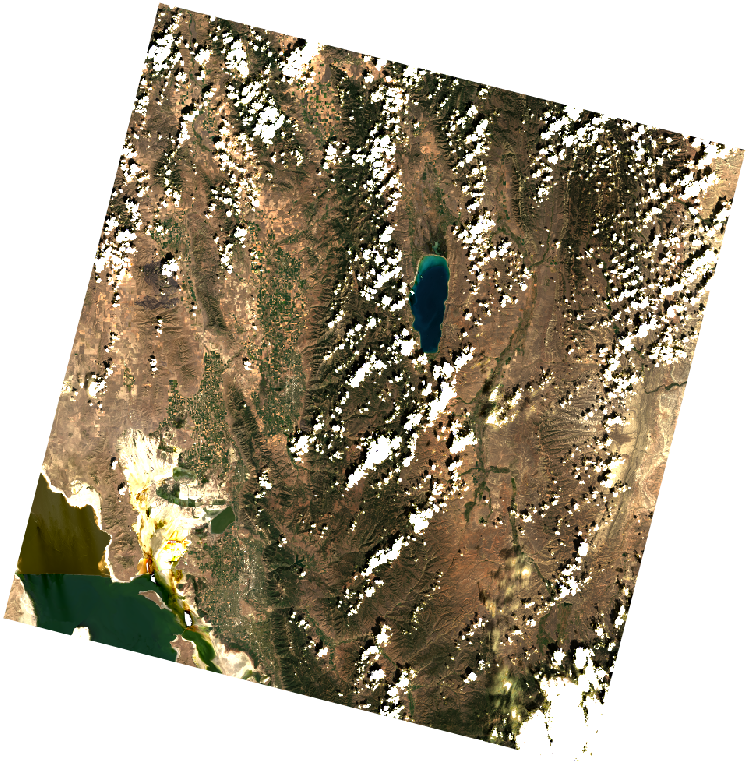

In [4]:
image_url = landsat_img.select([3, 2, 1]) \
    .multiply([0.0000275, 0.0000275, 0.0000275])\
    .add([-0.2, -0.2, -0.2])\
    .getThumbURL({'min': 0.0, 'max': 0.25, 
                  'region': landsat_region, 'dimensions': image_size})
#     .reproject(crs=landsat_crs, scale=landsat_cs * 8) \
Image(url=image_url, embed=True, format='png')

In [4]:
# Build the SIMS object from the Landsat image
model_obj = model.Image.from_landsat_c2_sr(
    landsat_img, 
    et_reference_source='IDAHO_EPSCOR/GRIDMET', 
    et_reference_band='eto',
    # CGM - Not using CIMIS since test image is in Utah
    # et_reference_source='projects/climate-engine/cimis/daily', 
    # et_reference_band='ETo',
    # crop_type_source='USDA/NASS/CDL/2017',
    crop_type_source='projects/openet/crop_type/annual_provisional',
)

### NDVI

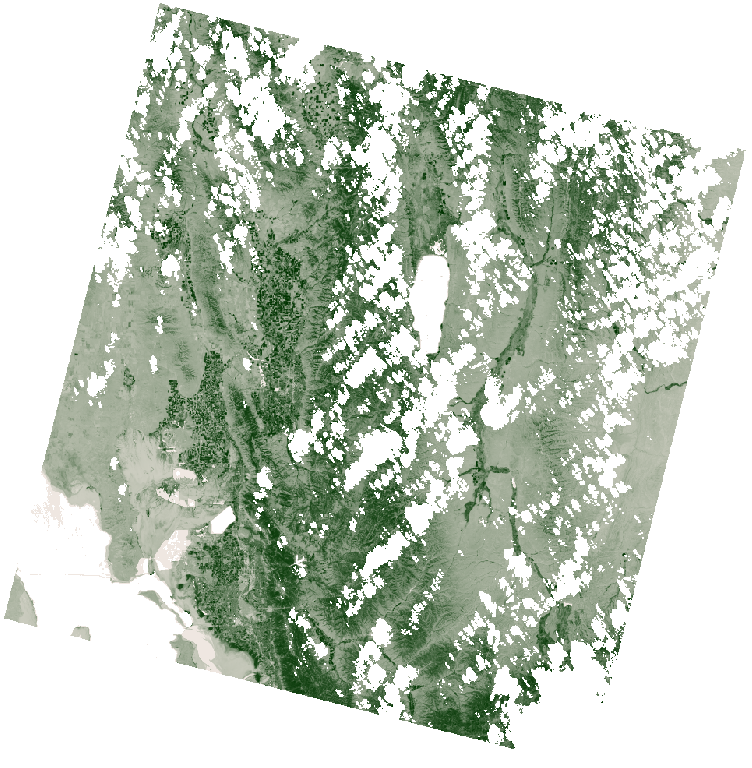

In [5]:
image_url = model_obj.ndvi \
    .getThumbURL({'min': -0.1, 'max': 0.9, 'palette': ndvi_palette, 
                  'region': landsat_region, 'dimensions': image_size})
#     .reproject(crs=landsat_crs, scale=landsat_cs * 8) \
Image(url=image_url, embed=True, format='png')

### Crop Type

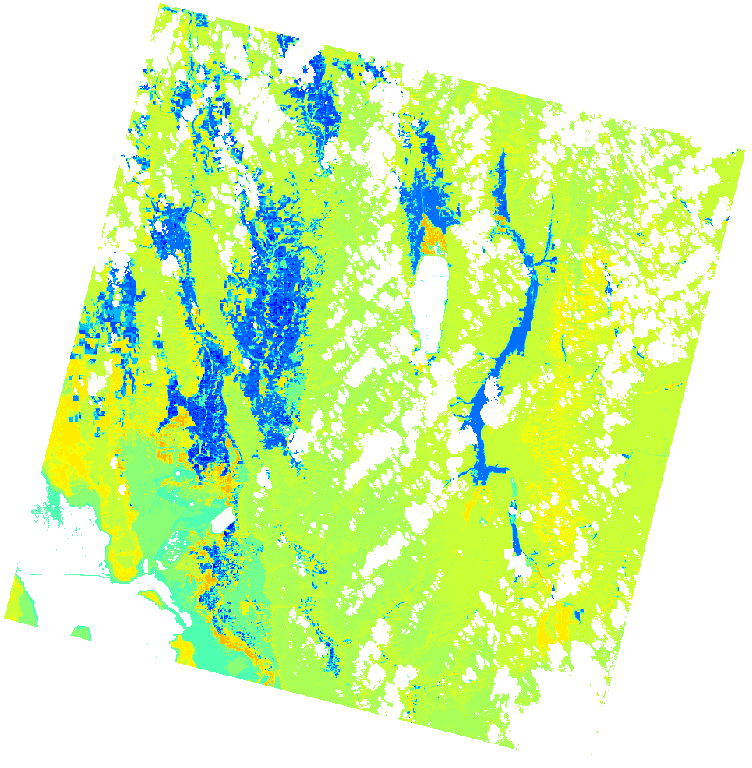

In [7]:
image_url = model_obj.crop_type \
    .getThumbURL({'min': 0, 'max': 255, 'palette': jet_palette, 
                  'region': landsat_region, 'dimensions': image_size})
Image(url=image_url, embed=True, format='png')

### Crop Class

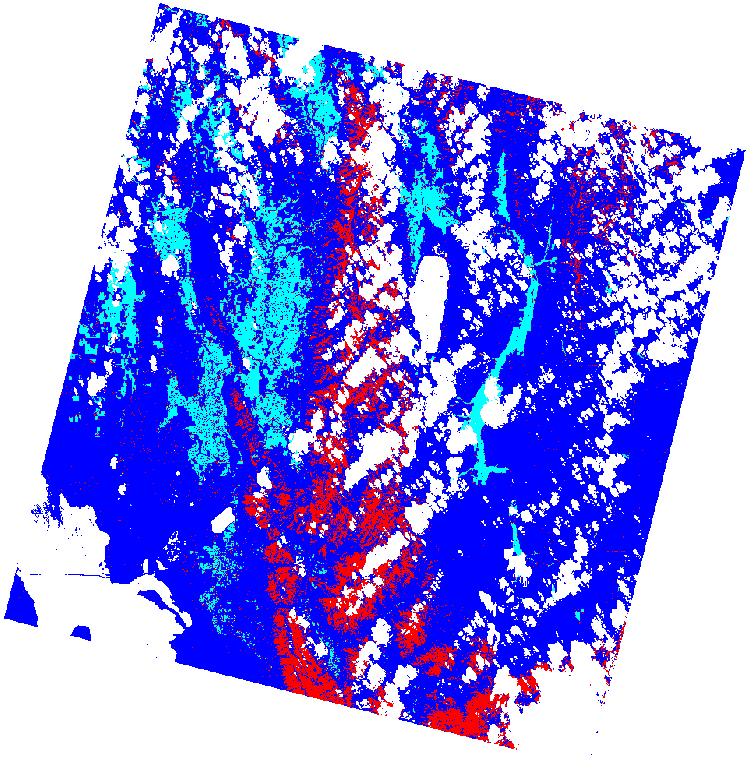

In [8]:
image_url = model_obj.crop_class \
    .getThumbURL({'min': 0, 'max': 3, 'palette': jet_palette, 
                  'region': landsat_region, 'dimensions': image_size})
Image(url=image_url, embed=True, format='png')

### ET fraction

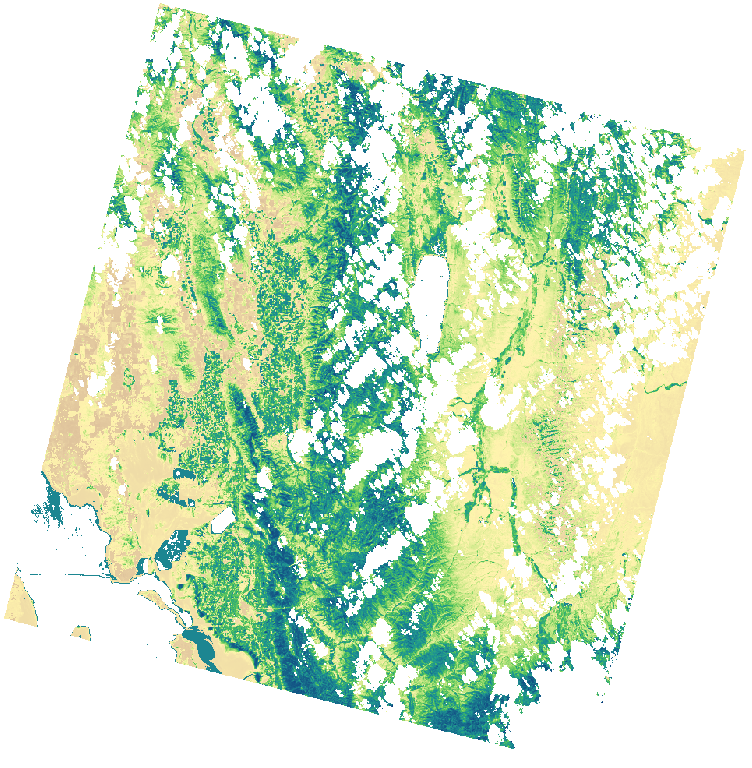

In [6]:
image_url = model_obj.et_fraction \
    .getThumbURL({'min': 0.0, 'max': 1.4, 'palette': et_palette, 
                  'region': landsat_region, 'dimensions': image_size})
Image(url=image_url, embed=True, format='png')

### Reference ET (from CIMIS)

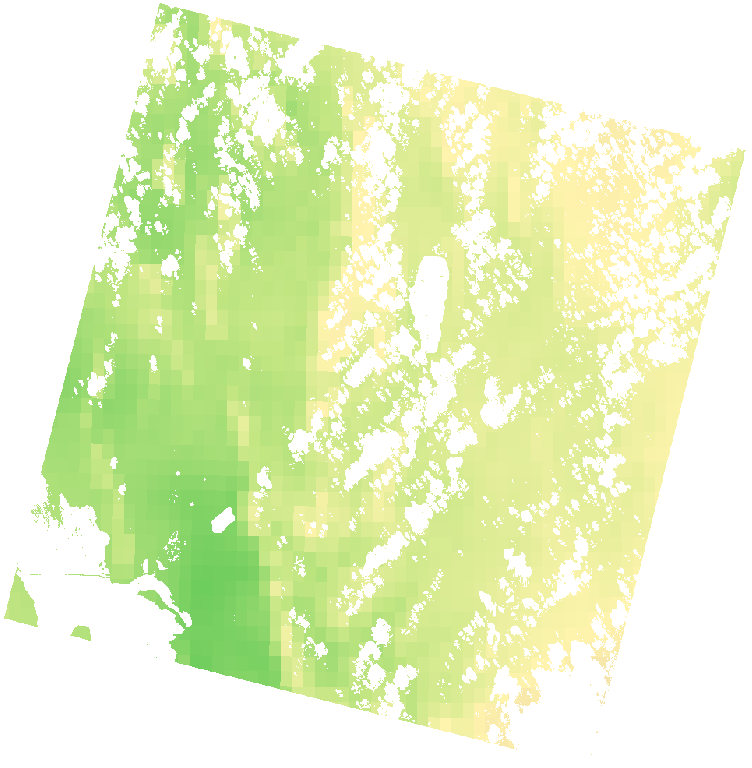

In [10]:
image_url = model_obj.et_reference \
    .getThumbURL({'min': 0, 'max': 12, 'palette': et_palette, 
                  'region': landsat_region, 'dimensions': image_size})
#     .reproject(crs=landsat_crs, scale=landsat_cs * 8) \
Image(url=image_url, embed=True, format='png')

### ET

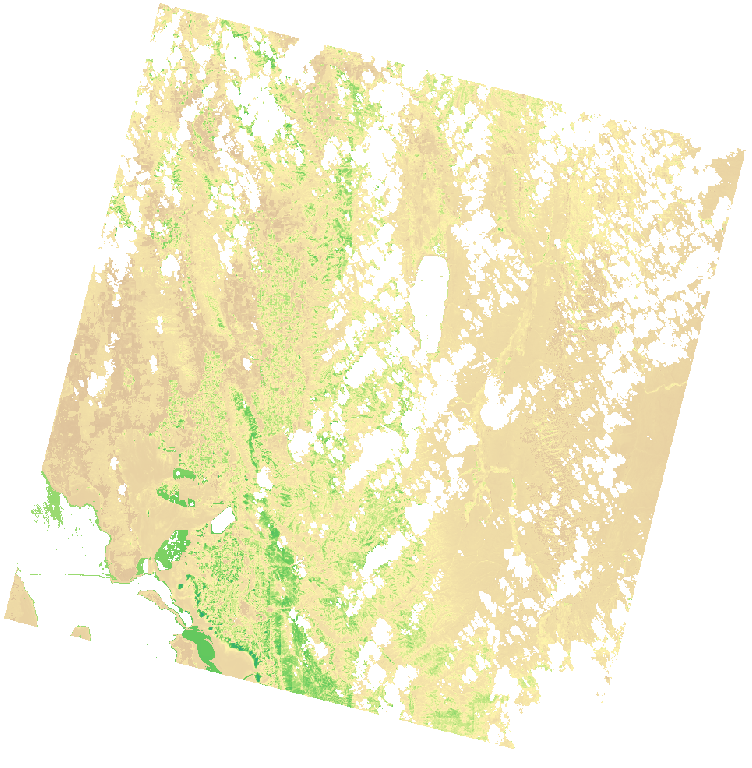

In [7]:
image_url = model_obj.et \
    .getThumbURL({'min': 0, 'max': 12, 'palette': et_palette, 
                  'region': landsat_region, 'dimensions': image_size})
Image(url=image_url, embed=True, format='png')

### "Calculate" Method

Return a multiband image of the model variables

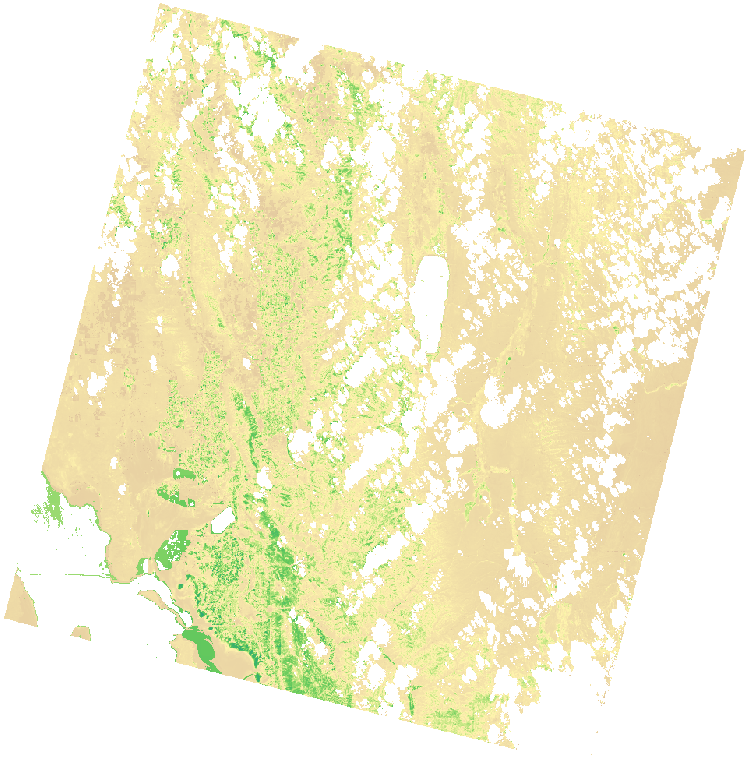

In [12]:
image_url = model_obj \
    .calculate(['et', 'et_reference', 'et_fraction']).select(['et']) \
    .getThumbURL({'min': 0, 'max': 12, 'palette': et_palette, 
                  'region': landsat_region, 'dimensions': image_size})
Image(url=image_url, embed=True, format='png')